In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
# fix random seed for reproducibility
np.random.seed(7)
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# # real_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
# # septic_data = pd.read_csv("/content/sample_data/SepticDataset1.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8') 
# # septic_data=septic_data.drop(0, axis=1)
# # septic_data=septic_data.drop(1, axis=1)
# # septic_data.rename(columns = {2: 0, 3: 1}, inplace = True)
# # real_data[1] = real_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
# # septic_data=septic_data.iloc[0:1500,:]
# # news_data= pd.concat([real_data, septic_data], axis=0)
# # print(real_data.shape)
# # print(septic_data.shape)
# # news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
# # labels=news_data[1]
# # labels.head()     
# # X = news_data[0]
# # Y=news_data[1]
# # x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.05, random_state=7)
# real_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
# real_data[1] = real_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
# # real_data[0] = real_data[0].replace('\n', '', regex=True).str.strip()  
# #labels=news_data[1]
# #labels.head()     
# #print(type(labels))
# #news_data[1].value_counts()
# septic_data = pd.read_csv("/content/sample_data/train.csv", header=None, skipinitialspace=True , encoding='utf-8') 
# # septic_data=septic_data.drop(0, axis=1)
# # septic_data=septic_data.drop(1, axis=1)
# # septic_data.rename(columns = {2: 0, 3: 1}, inplace = True)
# #septic_data=septic_data.iloc[0:1500,:]
# # septic_data[0] = septic_data[0].replace('\n', '', regex=True).str.strip()
# news_data= pd.concat([real_data, septic_data], axis=0)
# news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
# #news_data.head(20)
# print(news_data.head(20))
# print(real_data.head(20))
# print(septic_data.head(20))
    
# labels=news_data[1]
# labels.head()     
# #print(type(labels))
    
# #news_data[1].value_counts()
    
# X = news_data[0]
# Y=news_data[1]
# x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.05, random_state=7)
 
# x_train = x_train.str.replace('\d+', '') # removing all numbers
# x_test = x_test.str.replace('\d+', '')
# from nltk.corpus import stopwords
# stop = stopwords.words('english')
# x_train = x_train.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# x_test = x_test.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# tokenizer = Tokenizer(num_words=None) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
# tokenizer.fit_on_texts(x_train)
# vocab_size = len(tokenizer.word_index) + 1  
# data = []
# punc = '.'
# for i in x_train:
#   i = i[:-1]
#   token = word_tokenize(i)
#   if punc in token:
#     for index ,val in enumerate(token):
#       if punc == val:
#         token.pop(index)           
#   data.append(token)
# x_train = tokenizer.texts_to_sequences(data) 
# x_test = tokenizer.texts_to_sequences(x_test)
# maxlen = 100
# x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
# x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
# y_train = np.array(y_train)
# y_test = np.array(y_test)
# y_train = y_train.astype('float64')
# y_test = y_test.astype('float64')
# print(('X_train shape:', x_train.shape))
# print(('X_test shape:', x_test.shape))
# print(('y_train shape:', y_train.shape))
# print(('y_test shape:', y_test.shape))






# real_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
# septic_data = pd.read_csv("/content/sample_data/Swapnil_Extra_Annotation.csv", header=None, skipinitialspace=True , encoding='utf-8') 
# real_data[1] = real_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
# news_data= pd.concat([real_data, septic_data], axis=0)
# septic_data = pd.read_csv("/content/sample_data/Prasant_Extra_Annotation.csv", header=None, skipinitialspace=True , encoding='utf-8') 
# news_data= pd.concat([news_data, septic_data], axis=0)
# septic_data = pd.read_csv("/content/sample_data/Kunal_Extra_Annotation.csv", header=None, skipinitialspace=True , encoding='utf-8') 
# news_data= pd.concat([news_data, septic_data], axis=0)
# septic_data = pd.read_csv("/content/sample_data/ExtraCovidAnnotation.csv", header=None, skipinitialspace=True , encoding='utf-8') 
# news_data= pd.concat([news_data, septic_data], axis=0)
# septic_data = pd.read_csv("/content/sample_data/CovidData.csv", header=None, skipinitialspace=True , encoding='utf-8') 
# news_data= pd.concat([news_data, septic_data], axis=0)
# news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
# print(news_data.head(20))
# print(real_data.head(20))
# print(septic_data.head(20))
# labels=news_data[1]
# labels.head()     
# X = news_data[0]
# Y=news_data[1]
# x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.05, random_state=7)
# x_train = x_train.str.replace('\d+', '') # removing all numbers
# x_test = x_test.str.replace('\d+', '')
# from nltk.corpus import stopwords
# stop = stopwords.words('english')
# x_train = x_train.apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
# x_test = x_test.apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
# tokenizer = Tokenizer(num_words=None) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
# tokenizer.fit_on_texts(x_train)
# vocab_size = len(tokenizer.word_index) + 1  
# data = []
# punc = '.'
# for i in x_train:
#     i = i[:-1]
#     token = word_tokenize(i)
#     if punc in token:
#         for index ,val in enumerate(token):
#             if punc == val:
#                 token.pop(index)           
#     data.append(token)
# x_train = tokenizer.texts_to_sequences(data) 
# x_test = tokenizer.texts_to_sequences(x_test)
# maxlen = 100
# x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
# x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
# y_train = np.array(y_train)
# y_test = np.array(y_test)
# y_train = y_train.astype('float64')
# y_test = y_test.astype('float64')
# print(('X_train shape:', x_train.shape))
# print(('X_test shape:', x_test.shape))
# print(('y_train shape:', y_train.shape))
# print(('y_test shape:', y_test.shape))

In [3]:
# news_data.dropna(axis=0, inplace=True)
# x = news_data[0]
# y = news_data[1]
# x_train , x_test ,y_train ,  y_test = train_test_split(x, y, test_size = 0.1)

In [4]:
# print(len(x_train))
# data = []
# punc = '.'
# for i in x_train:
#     i = i[:-1]
#     token = word_tokenize(i)
#     if punc in token:
#         for index ,val in enumerate(token):
#             if punc == val:
#                 token.pop(index)
        
#     data.append(token)
    
# print(data)  

In [5]:
# tokenizer = Tokenizer(num_words=5000) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
# tokenizer.fit_on_texts(x_train)
# x_train = tokenizer.texts_to_sequences(x_train)
# x_test = tokenizer.texts_to_sequences(x_test)

In [6]:
# maxlen = 100
# x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
# x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
# print(x_train)
# news_data.info()













# word_index = tokenizer.word_index
# vocab_size=len(word_index)

In [7]:
# from keras import layers

# model = Sequential()
# model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# model.add(layers.Conv1D(128, 5, activation='relu'))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.fit(x_train, y_train,epochs=10,batch_size=10)


















import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools

In [8]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()


In [9]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

#LSTM

In [10]:
# # Import tensor representations for words

# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
#     -O /tmp/glove.6B.100d.txt
# embeddings_index = {};
# with open('/tmp/glove.6B.100d.txt') as f:
#     for line in f:
#         values = line.split();
#         word = values[0];
#         coefs = np.asarray(values[1:], dtype='float32');
#         embeddings_index[word] = coefs;
# #print(len(coefs))

# embeddings_matrix = np.zeros((vocab_size+1, 100));
# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word);
#     if embedding_vector is not None:
#         embeddings_matrix[i] = embedding_vector;

In [11]:
# from tensorflow.keras import Model, Input
# from tensorflow.keras.layers import LSTM, Embedding, Dense
# from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
# print(x_train.shape)
# model = Sequential()
# input_word = Input(shape=(7026,))
# model = Embedding(input_dim=x_train.shape[0], output_dim=1, input_length=100)(input_word)
# model = SpatialDropout1D(0.1)(model)
# model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
# out = TimeDistributed(Dense(1, activation="sigmoid"))(model)
# model = Model(input_word, out)
# model.summary()
# def create_model(x_train, y_train, x_test, y_test):
#     num_classes = 1 # y_train.shape[1]
#     num_tokens = 100 #x_train.shape[1]
#     print(num_classes)
#     print(num_tokens)
#     model = Sequential()
#     model.add(Embedding(vocab_size, output_dim = {{choice([16,32,60, 80, 100])}}, input_length = 100))
#     model.add(Dropout({{choice([0.3, 0.4, 0.5, 0.6])}}))
#     model.add(Conv1D(filters = {{choice([32,50, 60, 80])}}, kernel_size = {{choice([3,6,10,15,20,30])}}, padding='valid', activation='relu', strides=1))
#     model.add(GlobalMaxPool1D())
#     model.add(Dense(num_classes))
#     model.add(Activation('sigmoid'))

#     model.compile(loss='binary_crossentropy',
#                   optimizer={{choice(['adam', 'sgd'])}},
#                   metrics=['acc'])

#     # Optional to log output from Keras
#     #csv_logger = keras.callbacks.CSVLogger('Logs/dl_model.log')
    
#     result = model.fit(x_train, y_train,
#               batch_size=128,
#               epochs=10,
#               verbose=0,
#               validation_split=0.1)
#     #get the highest validation accuracy of the training epochs
#     validation_acc = np.amax(result.history['val_acc']) 
#     print('Best validation acc of epoch:', validation_acc)
#     return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

In [12]:
# model.compile(optimizer="adam",
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])
# import tensorflow as tf
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size+1, 100, weights=[embeddings_matrix], trainable=False),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv1D(64, 5, activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=4),
#     tf.keras.layers.LSTM(20, return_sequences=True),
#     tf.keras.layers.LSTM(20),
#     tf.keras.layers.Dropout(0.2),  
#     tf.keras.layers.Dense(512),
#     tf.keras.layers.Dropout(0.3),  
#     tf.keras.layers.Dense(256),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [13]:
# # print(x_train.shape , y_train.shape)

# # history = model.fit(
# #     x=x_train,
# #     y=y_train,
# #     epochs=10
# # )

# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()

# history = model.fit(x_train, y_train, epochs=5, batch_size=100, validation_data=[x_test, y_test])

# print("Training Complete")

In [14]:
# pred=np.round(model.predict(x_test))
# print_metrices(pred,y_test)
# plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
#                       title = 'Confusion matix of LSTM on test data')

In [15]:
# embedding_dim = 50


#Running ML Models

In [16]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [17]:
real_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
septic_data = pd.read_csv("/content/sample_data/Swapnil_Extra_Annotation.csv", header=None, skipinitialspace=True , encoding='utf-8') 
real_data[1] = real_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
news_data= pd.concat([real_data, septic_data], axis=0)
septic_data = pd.read_csv("/content/sample_data/Prasant_Extra_Annotation.csv", header=None, skipinitialspace=True , encoding='utf-8') 
news_data= pd.concat([news_data, septic_data], axis=0)
septic_data = pd.read_csv("/content/sample_data/Kunal_Extra_Annotation.csv", header=None, skipinitialspace=True , encoding='utf-8') 
news_data= pd.concat([news_data, septic_data], axis=0)
septic_data = pd.read_csv("/content/sample_data/ExtraCovidAnnotation.csv", header=None, skipinitialspace=True , encoding='utf-8') 
news_data= pd.concat([news_data, septic_data], axis=0)
septic_data = pd.read_csv("/content/sample_data/CovidData.csv", header=None, skipinitialspace=True , encoding='utf-8') 
news_data= pd.concat([news_data, septic_data], axis=0)
news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
print(news_data.head(20))
print(real_data.head(20))
print(septic_data.head(20))
labels=news_data[1]
labels.head()     
X = news_data[0]
Y=news_data[1]
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.05, random_state=7)
x_train = x_train.str.replace('\d+', '') # removing all numbers
x_test = x_test.str.replace('\d+', '')


train=x_train
test=x_test
train = train.map(lambda x: cleantext(x))
test = test.map(lambda x: cleantext(x))
y_train=y_train.astype('int')
y_test=y_test.astype('int')


                                                    0  1
0   The political predicament also appears to be t...  0
1   The CM had planned to meet the duo when he com...  0
2   He’s now scheduled to visit New Delhi on Thurs...  0
3   “If he fails to do so, he would face open rebe...  0
4   “Further delay is likely. Despite threats from...  0
5   “The party should make a concerted effort to i...  0
6   Taking serious note of allegations pertaining ...  0
7   Panchayat raj and mining minister Pedireddy Ra...  0
8   Sources said the party legislator reportedly s...  0
9   The legislator is his report said that large q...  0
10  The legislator claimed that the gravel was ext...  0
11  “The Mandal Parishad Development Officers (MPD...  0
12  He submitted also certain documents to substan...  0
13  “The MPDOs requisitioned for supply of about 8...  0
14  He said that massive illegal mining had not on...  0
15  The legislator said that field level officials...  0
16  Curiously, an MPDO, who is 

#SVM

SVM
test:
[[148  34]
 [ 32 151]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       182
           1       0.82      0.83      0.82       183

    accuracy                           0.82       365
   macro avg       0.82      0.82      0.82       365
weighted avg       0.82      0.82      0.82       365

Accuracy :  0.8191780821917808
Precison :  0.8192435605415619
Recall :  0.8191780821917808
F1 :  0.8191862263449369


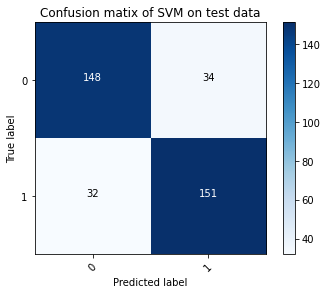

In [18]:
pipeline = Pipeline([
        ('bow', CountVectorizer(max_features= 800)),  
        ('tfidf', TfidfTransformer()),
        ('c', LinearSVC())
    ])
fit = pipeline.fit(train,y_train)
print('SVM')
print ('test:')
pred=pipeline.predict(test)
print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of SVM on test data')

#Logistic Regression

Logistic Regression
Test:
[[152  30]
 [ 32 151]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       182
           1       0.83      0.83      0.83       183

    accuracy                           0.83       365
   macro avg       0.83      0.83      0.83       365
weighted avg       0.83      0.83      0.83       365

Accuracy :  0.8301369863013699
Precison :  0.8301919354692765
Recall :  0.8301369863013699
F1 :  0.830139536337605


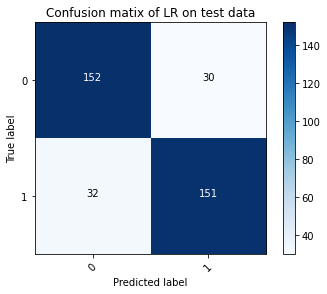

In [19]:
pipeline = Pipeline([
        ('bow', CountVectorizer(max_features= 800)),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(train,y_train)
print('Logistic Regression')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of LR on test data')

#Gradient Boosting Classifier

Gradient Boost
Test:
[[119  63]
 [ 31 152]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.72       182
           1       0.71      0.83      0.76       183

    accuracy                           0.74       365
   macro avg       0.75      0.74      0.74       365
weighted avg       0.75      0.74      0.74       365

Accuracy :  0.7424657534246575
Precison :  0.757962076848221
Recall :  0.7424657534246575
F1 :  0.744523906875523


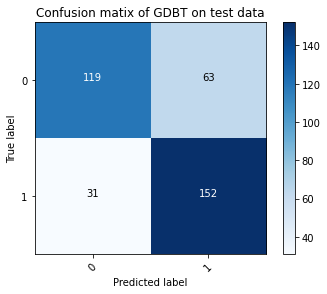

In [20]:
pipeline = Pipeline([
        ('bow', CountVectorizer(max_features= 800)),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Gradient Boost')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of GDBT on test data')

#Decision Tree Classifier

Decision Tree
Test:
[[130  52]
 [ 34 149]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       182
           1       0.74      0.81      0.78       183

    accuracy                           0.76       365
   macro avg       0.77      0.76      0.76       365
weighted avg       0.77      0.76      0.76       365

Accuracy :  0.7643835616438356
Precison :  0.7693112187610279
Recall :  0.7643835616438356
F1 :  0.764990052656584


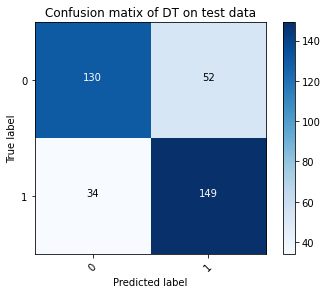

In [21]:
pipeline = Pipeline([
        ('bow', CountVectorizer(max_features= 800)),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Decision Tree')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of DT on test data')

#Random Forest Classifier

Random Forest Classifier
Test:
[[158  24]
 [ 32 151]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       182
           1       0.86      0.83      0.84       183

    accuracy                           0.85       365
   macro avg       0.85      0.85      0.85       365
weighted avg       0.85      0.85      0.85       365

Accuracy :  0.8465753424657534
Precison :  0.8475177042435071
Recall :  0.8465753424657534
F1 :  0.8466398569490082


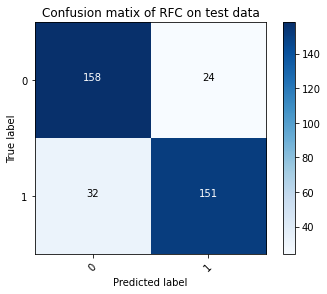

In [22]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
        ('bow', CountVectorizer(max_features= 800)),  
        ('tfidf', TfidfTransformer()),  
        ('c', RandomForestClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Random Forest Classifier')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of RFC on test data')